In [18]:
import pandas as pd 
df = pd.read_csv('movies.csv')
# df = df.loc[:,['Name','Critic_Score','Global_Sales']]
# budget_mode = df.budget.mean()
# print(budget_mode)
# df.Critic_Score.fillna(score_mode, inplace=True)
# df.dropna(subset=['Critic_Score'], inplace=True)
df.info()
# df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

d:\Hussein\Languages\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


We are after the budget and revenue columns, however there are many values in the exponential format, and some are just 0 which is a problem we can solve here:

In [55]:
def convert_exponential_to_int(x):
    if isinstance(x, float) and ('e' in str(x) or 'E' in str(x)):
        return int(x)
    else:
        return int(x)

# Apply the function to the specific column
df['budget'] = df['budget'].replace('NaN', pd.NA)
df['revenue'] = df['revenue'].replace('NaN', pd.NA)

df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

df2 = df.drop(df[df['budget'] == 0.0].index)
df2 = df.drop(df[df['revenue'] == 0.0].index)

df2.drop(df2[df2['budget'] == 0.0].index, inplace=True)
df2.drop(df2[df2['revenue'] == 0.0].index, inplace=True)

df2.reset_index(drop=True, inplace=True)
df2.dropna(subset=['budget'], inplace=True)
df2.dropna(subset=['revenue'], inplace=True)
df2.head(10)
# df.head(15)
# budget_mode = df2['budget'].mode()[0]
# print(budget_mode)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45460 entries, 0 to 45462
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45460 non-null  object 
 1   belongs_to_collection  4490 non-null   object 
 2   budget                 45460 non-null  float64
 3   genres                 45460 non-null  object 
 4   homepage               7778 non-null   object 
 5   id                     45460 non-null  object 
 6   imdb_id                45443 non-null  object 
 7   original_language      45449 non-null  object 
 8   original_title         45460 non-null  object 
 9   overview               44506 non-null  object 
 10  popularity             45460 non-null  object 
 11  poster_path            45077 non-null  object 
 12  production_companies   45460 non-null  object 
 13  production_countries   45460 non-null  object 
 14  release_date           45376 non-null  object 
 15  re

Now we will try to visualize our two variables (budget, and revenue) with scatter plots.

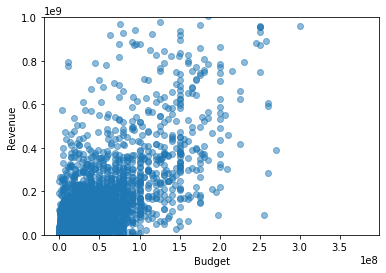

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
3,False,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
4,False,NaN,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0


In [92]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x = pd.DataFrame(df2, columns=["budget"])
y = pd.DataFrame(df2, columns=["revenue"])
plt.ylim(0,1000000000)
plt.scatter(x, y, alpha = 0.5)
plt.xlabel("Budget")
plt.ylabel("Revenue")

plt.show()
df2.head()

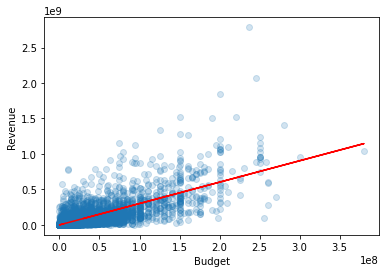

In [93]:
reg = LinearRegression()
reg.fit(x, y)
reg.coef_
reg.intercept_

plt.scatter(x, y, alpha = 0.2)

plt.xlabel("Budget")
plt.ylabel("Revenue")
# plt.ylim(0,20)
plt.plot(x, reg.predict(x), color='red')

plt.show()

In [97]:
X = df2[['budget']]
Y = df2['revenue']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, Y_train)

model_score = model.score(X_test, Y_test)
print(f'Model R-squared score: {model_score:.2f}')

Model R-squared score: 0.45


Predicted Revenues: [150335148 306726278 619508537 775899667]


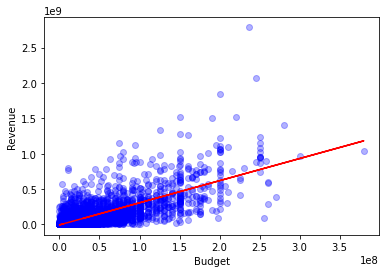

In [114]:
X_new = pd.DataFrame({'budget': [50000000, 100000000, 200000000, 250000000]})
Y_pred = model.predict(X_new)
predictions = Y_pred.astype(int)
print(f'Predicted Revenues: {predictions}')

# Plotting the results
plt.scatter(df2['budget'], df2['revenue'], color='blue', alpha=0.3)  # Original data points
plt.plot(df2['budget'], model.predict(X), color='red')  # Regression line
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()